[171109 - AMS] Created notebook

This notebook re-creates Fig 1 from Brentjens & de Bruyn (2005)

-------

In [1]:
# this embeds plots in the notebook
%matplotlib inline  

In [2]:
import numpy as np  # for arrays
import pylab as pl  # for plotting

-------

Make a function for the Galactic foreground:

$$
F_{\rm gal}(\phi) = (2\phi_{\rm fg})^{-1}~~~~-\phi_{\rm fg} \lt \phi \lt \phi_{\rm fg}
$$

and zero elsewhere. Therefore:

$$
P_{\rm gal}(\lambda^2) = \frac{\sin (2\phi_{\rm fg} \lambda^2)}{2\phi_{\rm fg}\lambda^2}
$$

Make an array of $\lambda^2$ values:

In [3]:
lam_sq = np.arange(0.01,1,0.01)

We're going to specify that $\phi_{\rm fg}= 2\,{\rm rad\,m^{-2}}$. We can then compute the Galactic contribution at each value of $\lambda^2$:

In [4]:
phi_fg = 2.
P_gal = np.sin(2*phi_fg*lam_sq)/(2*phi_fg*lam_sq) + 0*1j

---------

Now make a function for the radio galaxy lobe:

$$
F_{\rm rg}(\phi) = 0.25\delta(\phi - \phi_1)
$$

therefore:

$$
P_{\rm rg}(\lambda^2) = 0.25 \exp (2i\phi_1 \lambda^2) 
$$

which is equivalent to:

$$
P_{\rm rg}(\lambda^2) = 0.25 \cos (2\phi_1 \lambda^2) + 0.25 i \sin (2\phi_1 \lambda^2)
$$

so,

$$
Q_{\rm rg}(\lambda^2) = 0.25 \cos (2\phi_1 \lambda^2) 
$$

and 

$$
U_{\rm rg}(\lambda^2) = 0.25 \sin (2\phi_1 \lambda^2) 
$$

We're going to specify that $\phi_1= 10\,{\rm rad\,m^{-2}}$. We can then compute the contribution from the radio galaxy lobe at each value of $\lambda^2$:

In [5]:
phi_1 = 10.
P_rg = 0.25*np.cos(2*phi_1*lam_sq) + 1j*0.25*np.sin(2*phi_1*lam_sq)

------

The total polarized signal will be the sum of the radio galaxy contribution and the Galactic contribution:

In [6]:
P_tot = P_gal + P_rg

------

Now let's re-create Fig. 1 from Brentjens & de Bruyn (2005; https://arxiv.org/pdf/astro-ph/0507349.pdf)

First let's plot $Q_{\rm gal}$ (called $Q_{\rm fg}$ in the paper):

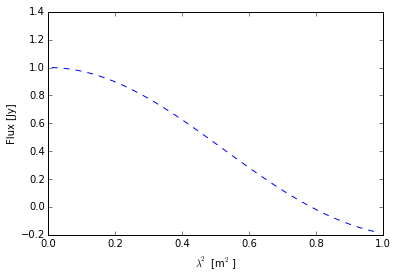

In [7]:
pl.subplot(111)
pl.plot(lam_sq,P_gal.real,ls='--')
pl.xlabel(r"$\lambda^2$ [m$^2$]")
pl.ylabel("Flux [Jy]")
pl.axis([0,1,-0.2,1.4])
pl.show()

Now let's plot on the magnitude of the total polarization as well:

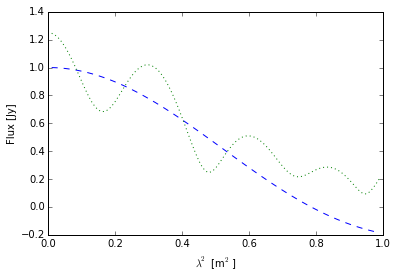

In [8]:
pl.subplot(111)
pl.plot(lam_sq,P_gal.real,ls='--')
pl.plot(lam_sq,np.absolute(P_tot),ls=':')
pl.xlabel(r"$\lambda^2$ [m$^2$]")
pl.ylabel("Flux [Jy]")
pl.axis([0,1,-0.2,1.4])
pl.show()

Now let's calculate the polarization angle:

$$
\chi = 0.5\tan^{-1}\left(\frac{U}{Q}\right)
$$

where $U$ is the imaginary part of the complex polarization, $P$, and $Q$ is the real part.

In [9]:
chi = 0.5*np.arctan2(P_tot.imag,P_tot.real)
chi*= (180./np.pi)   # convert radians to degrees

# hack to unwrap the arctangent [-pi/2,pi/2] wrap:
for i in range(1,len(chi)):
    delta_chi = np.abs(chi[i]-chi[i-1])
    if (delta_chi>45.):
        chi[i:]+=180.

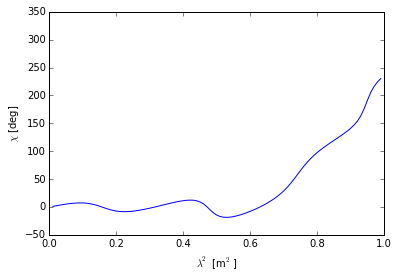

In [10]:
pl.subplot(111)
pl.plot(lam_sq,chi)
pl.xlabel(r"$\lambda^2$ [m$^2$]")
pl.ylabel(r"$\chi$ [deg]")
pl.axis([0,1,-50,350])
pl.show()

Now plot it all together:

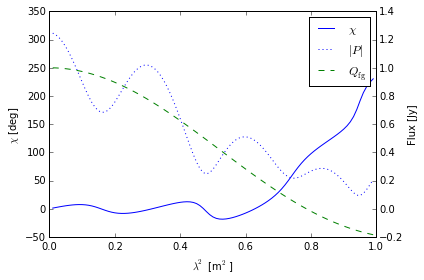

In [12]:
fig, ax1 = pl.subplots()
ln1 = ax1.plot(lam_sq, chi, 'b-',label=r"$\chi$")
ax1.set_xlabel(r"$\lambda^2$ [m$^2$]")
ax1.set_ylabel(r"$\chi$ [deg]")
ax1.set_ylim(-50, 350)

ax2 = ax1.twinx()
ln2 = ax2.plot(lam_sq,np.absolute(P_tot),ls=':',label=r"$|P|$")
ln3 = ax2.plot(lam_sq,P_gal.real,ls='--',label=r"$Q_{\rm fg}$")
ax2.set_ylabel("Flux [Jy]")
ax2.set_ylim(-0.2, 1.4)

# figure legend:
lns = ln1+ln2+ln3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=1)

fig.tight_layout()
pl.savefig("Fig1.png")
pl.show()